# Análise exploratória dos dados (EDA)

O diabetes é uma doença crônica grave na qual os indivíduos perdem a capacidade de regular efetivamente os níveis de glicose no sangue e pode levar a uma redução na qualidade de vida e na expectativa de vida.

O Sistema de Vigilância de Fatores de Risco Comportamentais (BRFSS) é uma pesquisa telefônica relacionada à saúde que é coletada anualmente pelo CDC (Centro de Controle e Prevenção de Doenças dos Estados Unidos). A cada ano, a pesquisa coleta respostas de milhares de americanos sobre comportamentos de risco relacionados à saúde, condições crônicas de saúde e o uso de serviços preventivos. Para este projeto, foi utilizado conjunto de dados disponível no Kaggle para o ano de 2015. 

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

Dicionário de variáveis:

- `Diabetes_binary`: 0 = sem diabetes, 1 = com diabetes
- `HighBP`: 0 = sem pressão alta, 1 = com pressão alta
- `HighChol`: 0 = sem colesterol alto, 1 = com colesterol alto
- `CholCheck`: 0 = não fez exame de colesterol na vida, 1 = fez exame de colesterol alguma vez
- `BMI`: Índice de Massa Corporal (IMC)
- `Smoker`: 0 = não fumante, 1 = fumante
- `Stroke`: 0 = sem histórico de AVC, 1 = com histórico de AVC
- `HeartDiseaseorAttack`: 0 = sem histórico de doença cardíaca ou ataque cardíaco, 1 = com histórico de doença cardíaca ou ataque cardíaco
- `PhysActivity`: 0 = não pratica atividade física, 1 = pratica atividade física
- `Fruits`: 0 = não consome frutas, 1 = consome frutas
- `Veggies`: 0 = não consome vegetais, 1 = consome vegetais
- `HvyAlcoholConsump`: 0 = não consome álcool em altas quantidades, 1 = consome álcool em altas quantidades
- `AnyHealthcare`: 0 = não tem plano de saúde, 1 = tem plano de saúde
- `NoDocbcCost`: 0 = não foi ao médico por questões financeiras, 1 = foi ao médico por questões financeiras (últimos 12 meses)
- `GenHlth`: Saúde geral (1 a 5) - 1 = Excelente, 2 = Muito boa, 3 = Boa, 4 = Aceitável, 5 = Ruim
- `MentHlth`: Nos últimos 30 dias, quantos dias a saúde mental não foi boa (0 a 30)
- `PhysHlth`: Nos últimos 30 dias, quantos dias a saúde física não foi boa (0 a 30)
- `DiffWalk`: 0 = não tem dificuldade para caminhar, 1 = tem dificuldade para caminhar
- `Sex`: 0 = feminino, 1 = masculino
- `Age`: Idade em faixas 1 = 18-24; 2 = 25-29; 3 = 30-34; 4 = 35-39; 5 = 40-44; 6 = 45-49; 7 = 50-54; 8 = 55-59; 9 = 60-64; 10 = 65-69; 11 = 70-74; 12 = 75-79; 13 = 80+
- `Education`: Níveis de ensino 1 = nunca frequentou a escola; 2 = escola primária; 3 = escola secundária incompleta ; 4 = escola secundária; 5 = faculdade incompleta ou curso técnico; 6 = completou faculdade ou diplomas superiores
- `Income`: Renda anual (dólares) em faixas 1 = < 10.000; 2 = 10.000-14.999; 3 = 15.000-19.999; 4 = 20.000-24.999; 5 = 25.000-34.999; 6 = 35.000-49.999; 7 = 50.000-74.999; 8 = 75.000+

### Importanado a Base

In [1]:
import pandas as pd
import numpy as np
from src.config import DADOS_TRATADOS
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from scipy.stats import kstest, norm, chi2_contingency

# Funções desenvolvidas para o projeto
from src.estatistica import (
    analise_levene,
    analise_ttest_ind,
    analise_mannwhitneyu
)

df_diabetes_tratado = pd.read_parquet(DADOS_TRATADOS)

df_diabetes_tratado.head()

,Diabetes,PressaoAlta,ColesterolAlto,ColesterolExame,IMC,Fumante,AVC,ProblemaCardiaco,AtividadeFisica,ComeFrutas,...,PlanoSaude,SemDinheiroConsultas,SaudeGeral,DiasProblemasMentais,DiasProblemasFisicos,DificuldadeAndar,Genero,FaixaIdade,Ensino,FaixaRenda
0,Não,Sim,Não,Sim,26,Não,Não,Não,Sim,Não,...,Sim,Não,Boa,5,30,Não,Masculino,35-39,Faculdade +,$75.000+
1,Não,Sim,Sim,Sim,26,Sim,Sim,Não,Não,Sim,...,Sim,Não,Boa,0,0,Não,Masculino,75-79,Faculdade +,$75.000+
2,Não,Não,Não,Sim,26,Não,Não,Não,Sim,Sim,...,Sim,Não,Excelente,0,10,Não,Masculino,80+,Faculdade +,$75.000+
3,Não,Sim,Sim,Sim,28,Sim,Não,Não,Sim,Sim,...,Sim,Não,Boa,0,3,Não,Masculino,70-74,Faculdade +,$75.000+
4,Não,Não,Não,Sim,29,Sim,Não,Não,Sim,Sim,...,Sim,Não,Muito boa,0,0,Não,Feminino,55-59,Faculdade inc. ou Técnico,$75.000+


In [2]:
df_diabetes_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Diabetes                70692 non-null  category
 1   PressaoAlta             70692 non-null  category
 2   ColesterolAlto          70692 non-null  category
 3   ColesterolExame         70692 non-null  category
 4   IMC                     70692 non-null  int8    
 5   Fumante                 70692 non-null  category
 6   AVC                     70692 non-null  category
 7   ProblemaCardiaco        70692 non-null  category
 8   AtividadeFisica         70692 non-null  category
 9   ComeFrutas              70692 non-null  category
 10  ComeLegumes             70692 non-null  category
 11  ConsumoBebidaAlcoolica  70692 non-null  category
 12  PlanoSaude              70692 non-null  category
 13  SemDinheiroConsultas    70692 non-null  category
 14  SaudeGeral            

### Separando as colunas por tipo de váriavel

In [3]:
colunas_numericas = df_diabetes_tratado.select_dtypes(include="number").columns.tolist()

coluna_alvo = "Diabetes"

colunas_categoricas = df_diabetes_tratado.select_dtypes(include="category").columns.tolist()
colunas_categoricas.remove(coluna_alvo)

colunas_binarias = df_diabetes_tratado.nunique()[df_diabetes_tratado.nunique() == 2].index.tolist()
colunas_binarias.remove(coluna_alvo)

colunas_nao_binarias = list(set(colunas_categoricas) - set(colunas_binarias))

In [4]:
colunas_numericas

['IMC', 'DiasProblemasMentais', 'DiasProblemasFisicos']

In [5]:
coluna_alvo

'Diabetes'

In [6]:
colunas_categoricas

['PressaoAlta',
 'ColesterolAlto',
 'ColesterolExame',
 'Fumante',
 'AVC',
 'ProblemaCardiaco',
 'AtividadeFisica',
 'ComeFrutas',
 'ComeLegumes',
 'ConsumoBebidaAlcoolica',
 'PlanoSaude',
 'SemDinheiroConsultas',
 'SaudeGeral',
 'DificuldadeAndar',
 'Genero',
 'FaixaIdade',
 'Ensino',
 'FaixaRenda']

In [7]:
colunas_binarias

['PressaoAlta',
 'ColesterolAlto',
 'ColesterolExame',
 'Fumante',
 'AVC',
 'ProblemaCardiaco',
 'AtividadeFisica',
 'ComeFrutas',
 'ComeLegumes',
 'ConsumoBebidaAlcoolica',
 'PlanoSaude',
 'SemDinheiroConsultas',
 'DificuldadeAndar',
 'Genero']

In [8]:
colunas_nao_binarias

['FaixaRenda', 'SaudeGeral', 'Ensino', 'FaixaIdade']

## Variáveis numéricas

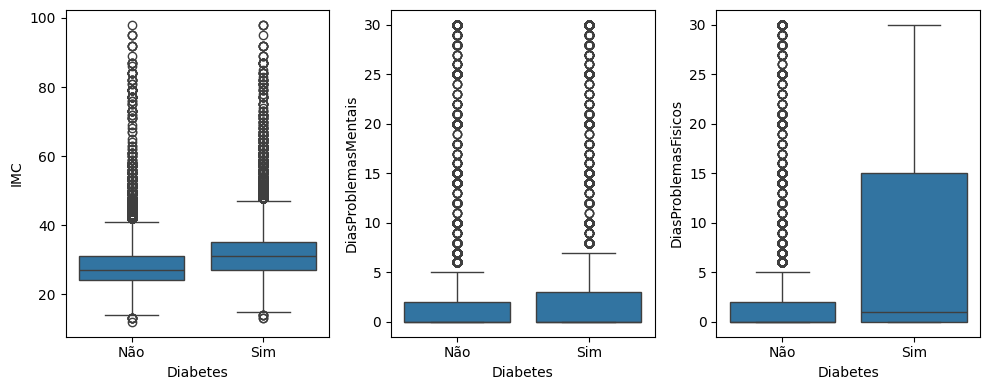

In [9]:

fig, axs = plt.subplots(1, 3, figsize=(10, 4))

for ax, coluna in zip(axs, colunas_numericas):
    sns.boxplot(data=df_diabetes_tratado, x=coluna_alvo, y=coluna, ax=ax)

plt.tight_layout()
plt.show()

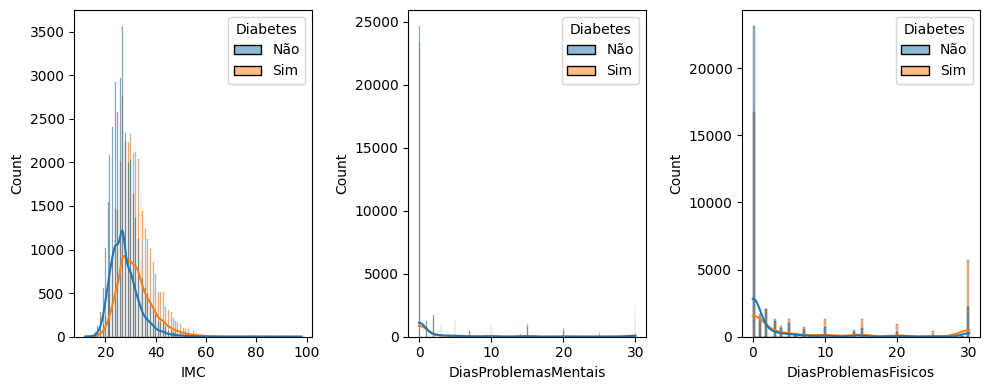

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

for ax, coluna in zip(axs, colunas_numericas):
    sns.histplot(data=df_diabetes_tratado, x=coluna, hue=coluna_alvo, kde=True, ax=ax)

plt.tight_layout()
plt.show()

- atenção para os dados de IMC terem sido arredondados para inteiros
- será que considerar que há diferença entre diabéticos e não diabéticos considerando IMC?

### Fazendo o describe das variáveis numéricas agrupado pela coluna alvo

In [11]:
df_diabetes_tratado.groupby(coluna_alvo, observed=False).describe().T

Diabetes                             Não           Sim
IMC                  count  35346.000000  35346.000000
                     mean      27.769960     31.944011
                     std        6.187636      7.363401
                     min       12.000000     13.000000
                     25%       24.000000     27.000000
                     50%       27.000000     31.000000
                     75%       31.000000     35.000000
                     max       98.000000     98.000000
DiasProblemasMentais count  35346.000000  35346.000000
                     mean       3.042268      4.461806
                     std        7.208408      8.947717
                     min        0.000000      0.000000
                     25%        0.000000      0.000000
                     50%        0.000000      0.000000
                     75%        2.000000      3.000000
                     max       30.000000     30.000000
DiasProblemasFisicos count  35346.000000  35346.000000
                     mean       3.666355      7.954479
                     std        8.098339     11.301491
                     min        0.000000      0.000000
                     25%        0.000000      0.000000
                     50%        0.000000      1.000000
                     75%        2.000000     15.000000
                     max       30.000000     30.000000

In [12]:
df_diabetes_tratado.corr(numeric_only=True)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
IMC,1.000000,0.104682,0.161862
DiasProblemasMentais,0.104682,1.000000,0.380272
DiasProblemasFisicos,0.161862,0.380272,1.000000


- teste t de Student para comparar médias de IMC entre diabéticos e não diabéticos?
- ou teste de Mann-Whitney U para comparar medianas de IMC entre diabéticos e não diabéticos?

### Faz sentido testar a normalidade das variáveis numéricas?

In [13]:
df_diabetes_tratado.groupby(coluna_alvo, observed=False).skew(numeric_only=True)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
Diabetes,,,
Não,2.231015,2.808070,2.480202
Sim,1.527018,2.065169,1.150047


### Agrupando e aplicando Kurtosis para verificar a distribuição dos dados

In [14]:
df_diabetes_tratado.groupby(coluna_alvo, observed=False)[colunas_numericas].apply(pd.DataFrame.kurtosis)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
Diabetes,,,
Não,12.901012,7.012218,4.910598
Sim,5.717382,2.873176,-0.341922


### Separando em variáveis para aplicar o teste de normalidade Kstest 

In [15]:
dados_imc_sim = df_diabetes_tratado.query("Diabetes == 'Sim'")["IMC"].values

dados_imc_nao = df_diabetes_tratado.query("Diabetes == 'Não'")["IMC"].values

### Aplicando o KSTest

In [16]:
print(kstest(dados_imc_nao, norm.cdf, args=(dados_imc_nao.mean(), dados_imc_nao.std())))
print(kstest(dados_imc_sim, norm.cdf, args=(dados_imc_sim.mean(), dados_imc_sim.std())))

KstestResult(statistic=np.float64(0.1209153634702329), pvalue=np.float64(0.0), statistic_location=np.int8(28), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.10452803408478695), pvalue=np.float64(0.0), statistic_location=np.int8(33), statistic_sign=np.int8(1))


### Criando um Dataframe da coluna IMC para aplicar o teste de variância de Levene

In [17]:
dataframe_imc = pd.DataFrame({"Sim": dados_imc_sim, "Não": dados_imc_nao})

dataframe_imc

,Sim,Não
0,30,26
1,25,26
2,28,26
3,23,28
4,27,29
...,...,...
35341,37,23
35342,29,29
35343,25,24
35344,18,53


### Aplicando o teste, como a normalidade foi rejeitada utilizaremos a mediana como parâmetro

In [18]:
analise_levene(dataframe_imc, center="median")

Teste de Levene
888.297
Ao menos uma varianca é diferente (valor p : 0.000)


### Aplicando o teste de Hipótese Manwhitneyu

In [19]:
analise_ttest_ind(dataframe_imc, variancias_iguais=False)

Teste t de Student
estatistica_ttest=81.591
Rejeita a hipótese nula (valor p : 0.000)


In [20]:
analise_mannwhitneyu(dataframe_imc)

Teste Mannwhitneyu
estatistica_mannwhitneyu=861173484.000
Rejeita a hipótese nula (valor p : 0.000)


### Os outliers interferem?

### Criando função para remover outliers

In [21]:
def remove_outliers(dados, largura_bigodes=1.5):
    q1 = dados.quantile(0.25)
    q3 = dados.quantile(0.75)
    iqr = q3 - q1
    return dados[(dados >= q1 - largura_bigodes * iqr) & (dados <= q3 + largura_bigodes * iqr)]

### Criando um cópia e removendo os outliers

In [22]:
df_diabetes_sem_outliers = df_diabetes_tratado.copy()

for coluna in colunas_numericas:
    df_diabetes_sem_outliers[coluna] = remove_outliers(df_diabetes_sem_outliers[coluna])

df_diabetes_sem_outliers.describe()

,IMC,DiasProblemasMentais,DiasProblemasFisicos
count,68511.000000,58876.000000,60068.000000
mean,29.129673,0.526615,1.880619
std,5.695466,1.271375,3.727202
min,13.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,33.000000,0.000000,2.000000
max,45.000000,5.000000,15.000000


In [23]:
df_diabetes_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Diabetes                70692 non-null  category
 1   PressaoAlta             70692 non-null  category
 2   ColesterolAlto          70692 non-null  category
 3   ColesterolExame         70692 non-null  category
 4   IMC                     68511 non-null  float64 
 5   Fumante                 70692 non-null  category
 6   AVC                     70692 non-null  category
 7   ProblemaCardiaco        70692 non-null  category
 8   AtividadeFisica         70692 non-null  category
 9   ComeFrutas              70692 non-null  category
 10  ComeLegumes             70692 non-null  category
 11  ConsumoBebidaAlcoolica  70692 non-null  category
 12  PlanoSaude              70692 non-null  category
 13  SemDinheiroConsultas    70692 non-null  category
 14  SaudeGeral            

### Refazendo a análise sem os outliers

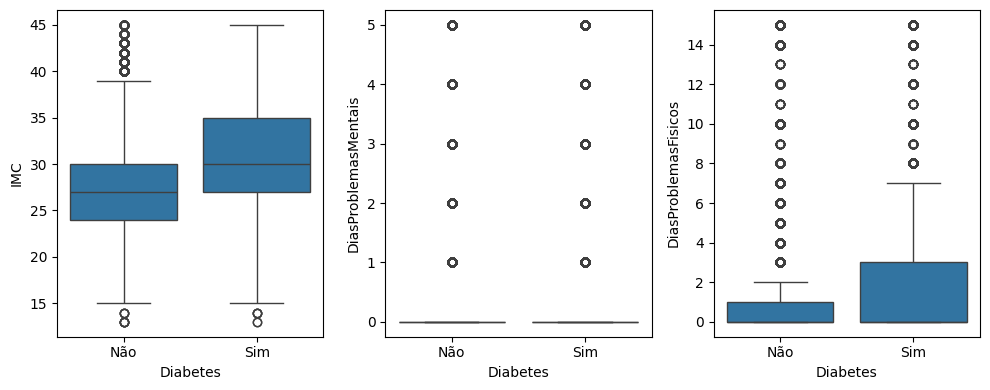

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

for ax, coluna in zip(axs, colunas_numericas):
    sns.boxplot(data=df_diabetes_sem_outliers, x=coluna_alvo, y=coluna, ax=ax)

plt.tight_layout()
plt.show()


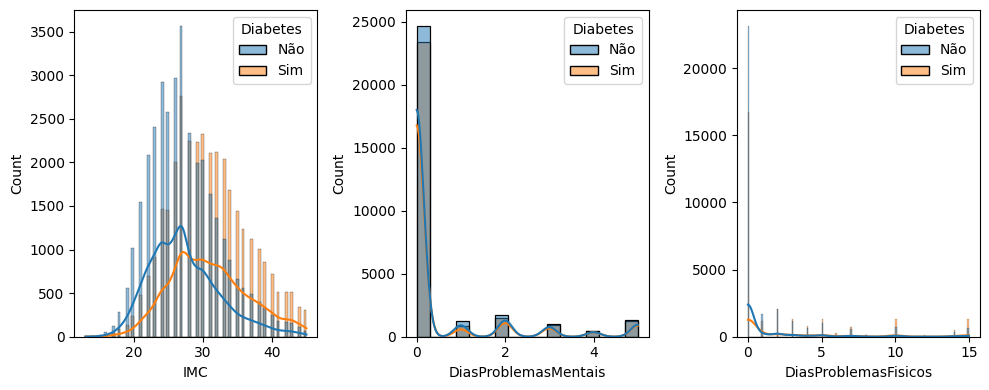

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

for ax, coluna in zip(axs, colunas_numericas):
    sns.histplot(data=df_diabetes_sem_outliers, x=coluna, hue=coluna_alvo, kde=True, ax=ax)

plt.tight_layout()
plt.show()

In [26]:
df_diabetes_sem_outliers.groupby(coluna_alvo, observed=False).skew(numeric_only=True)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
Diabetes,,,
Não,0.714415,2.454599,2.874805
Sim,0.323244,2.507093,1.856026


In [27]:
df_diabetes_sem_outliers.groupby(coluna_alvo, observed=False)[colunas_numericas].apply(pd.DataFrame.kurtosis)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
Diabetes,,,
Não,0.481335,5.003764,8.079214
Sim,-0.343434,5.185706,2.367289


In [28]:
dados_imc_sim_sem_outliers = df_diabetes_sem_outliers.query("Diabetes == 'Sim'")["IMC"].values
dados_imc_nao_sem_outliers = df_diabetes_sem_outliers.query("Diabetes == 'Não'")["IMC"].values

dataframe_imc_sem_outliers = pd.DataFrame({"Sim": dados_imc_sim_sem_outliers, "Não": dados_imc_nao_sem_outliers})
dataframe_imc_sem_outliers

,Sim,Não
0,30.0,26.0
1,25.0,26.0
2,28.0,26.0
3,23.0,28.0
4,27.0,29.0
...,...,...
35341,37.0,23.0
35342,29.0,29.0
35343,25.0,24.0
35344,18.0,NaN


In [29]:
dados_imc_nao_sem_outliers.mean()

np.float64(nan)

In [30]:
dataframe_imc_sem_outliers["Não"].mean()

np.float64(27.39410195358444)

### Mesmo removendo os outliers ainda continua rejeitando o teste de normalidade

In [31]:
print(
    kstest(
        dataframe_imc_sem_outliers["Não"], 
        norm.cdf, 
        args=(dataframe_imc_sem_outliers["Não"].mean(), 
              dataframe_imc_sem_outliers["Não"].std()), 
        nan_policy="omit")
)

print(
    kstest(
        dataframe_imc_sem_outliers["Sim"], 
        norm.cdf, 
        args=(dataframe_imc_sem_outliers["Sim"].mean(), 
              dataframe_imc_sem_outliers["Sim"].std()), 
        nan_policy="omit")
)

KstestResult(statistic=np.float64(0.10815079726309113), pvalue=np.float64(0.0), statistic_location=np.float64(27.0), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.07345716240963451), pvalue=np.float64(2.3370072025211114e-158), statistic_location=np.float64(30.0), statistic_sign=np.int8(1))


In [32]:
analise_levene(dataframe_imc_sem_outliers, center="median")

Teste de Levene
532.986
Ao menos uma varianca é diferente (valor p : 0.000)


### Continua rejeitando a hipótese nula

In [33]:
analise_ttest_ind(dataframe_imc_sem_outliers, variancias_iguais=False)

Teste t de Student
estatistica_ttest=85.248
Rejeita a hipótese nula (valor p : 0.000)


In [34]:
analise_mannwhitneyu(dataframe_imc_sem_outliers)

Teste Mannwhitneyu
estatistica_mannwhitneyu=801702843.000
Rejeita a hipótese nula (valor p : 0.000)


Links e artigos sobre testes de hipótese em datasets grandes:

- https://stats.stackexchange.com/questions/2492/is-normality-testing-essentially-useless
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/pdf/ijem-10-486.pdf
- https://www.bmj.com/content/bmj/310/6975/298.full.pdf
- https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/1471-2288-12-81

### Variáveis categóricas

### Verificando relações entre as colunas e a coluna alvo Diabetes

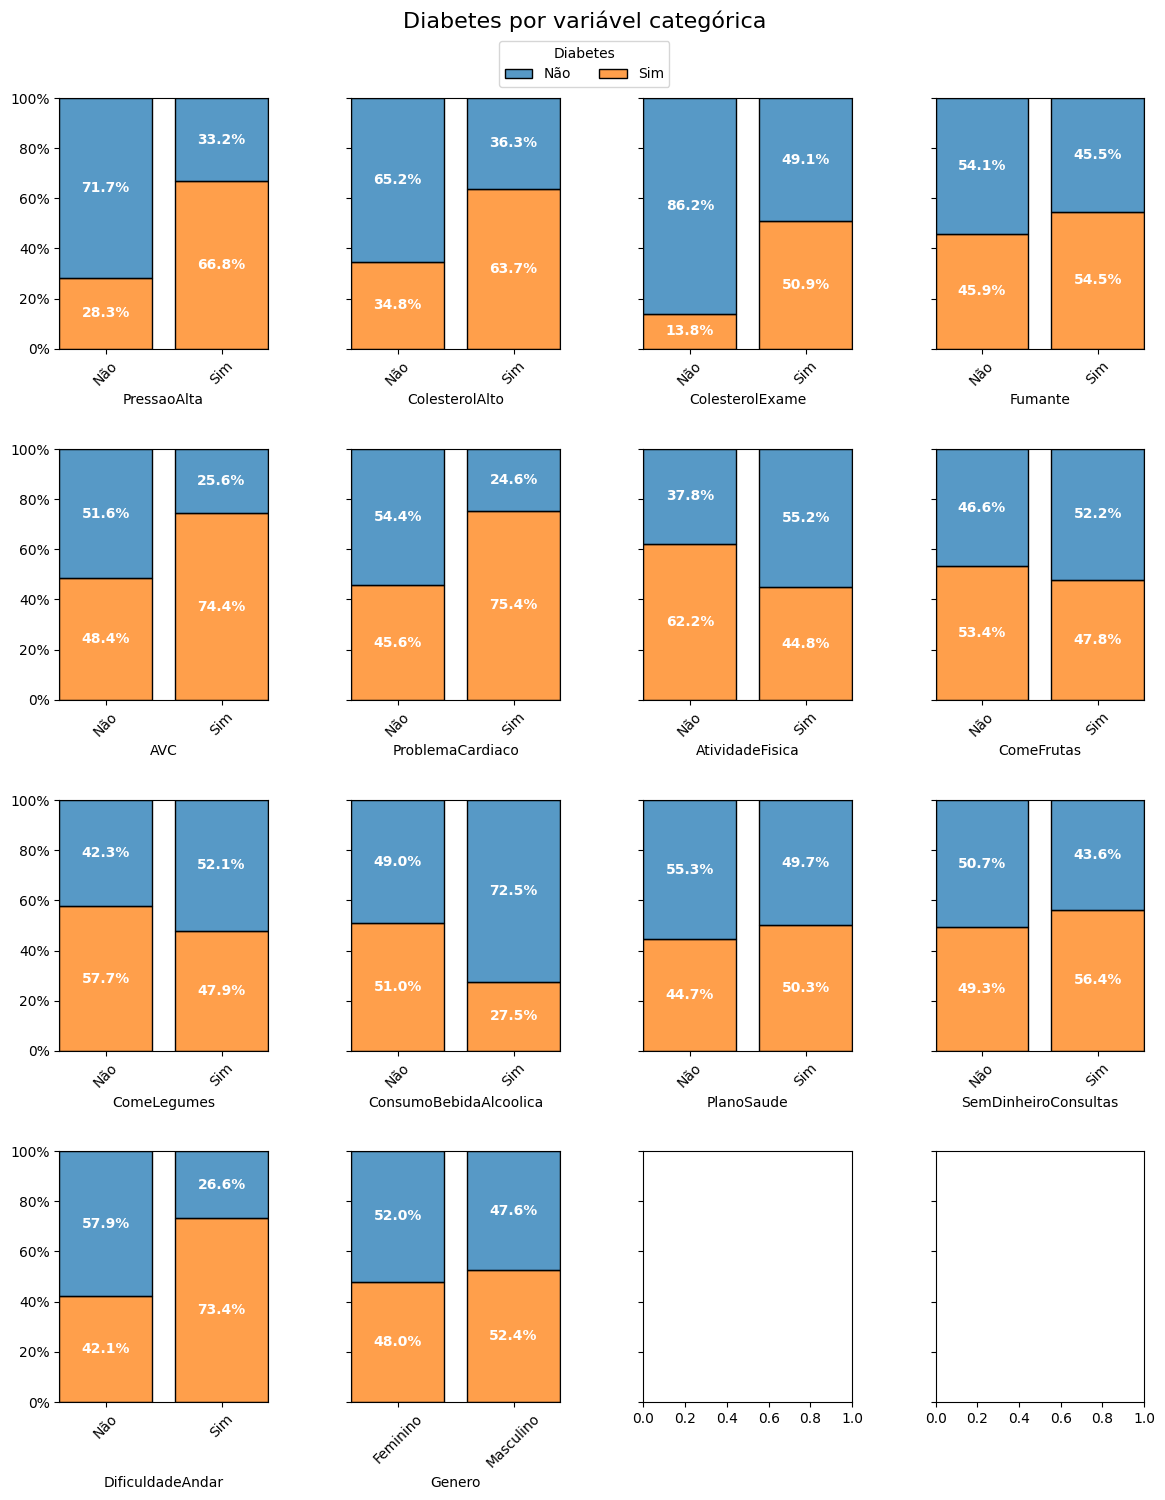

In [35]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14, 16), sharey=True)

for i, coluna in enumerate(colunas_binarias):
    h = sns.histplot(x=coluna,
                     hue=coluna_alvo,
                     data=df_diabetes_tratado,
                     multiple='fill',
                     ax=axs.flat[i],
                     stat='percent',
                     shrink=0.8)
    h.tick_params(axis='x', labelrotation=45)

    h.yaxis.set_major_formatter(PercentFormatter(1))
    h.set_ylabel('')

    for bar in h.containers:
        h.bar_label(bar, label_type='center', labels=[f'{b.get_height():.1%}' for b in bar], color='white', weight='bold')

    legend = h.get_legend()
    legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Diabetes', bbox_to_anchor=(0.5, 0.965))
fig.suptitle('Diabetes por variável categórica', fontsize=16)

fig.align_labels()

plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.925)

plt.show()

### Verificando a relação das colunas não binárias com a coluna Alvo


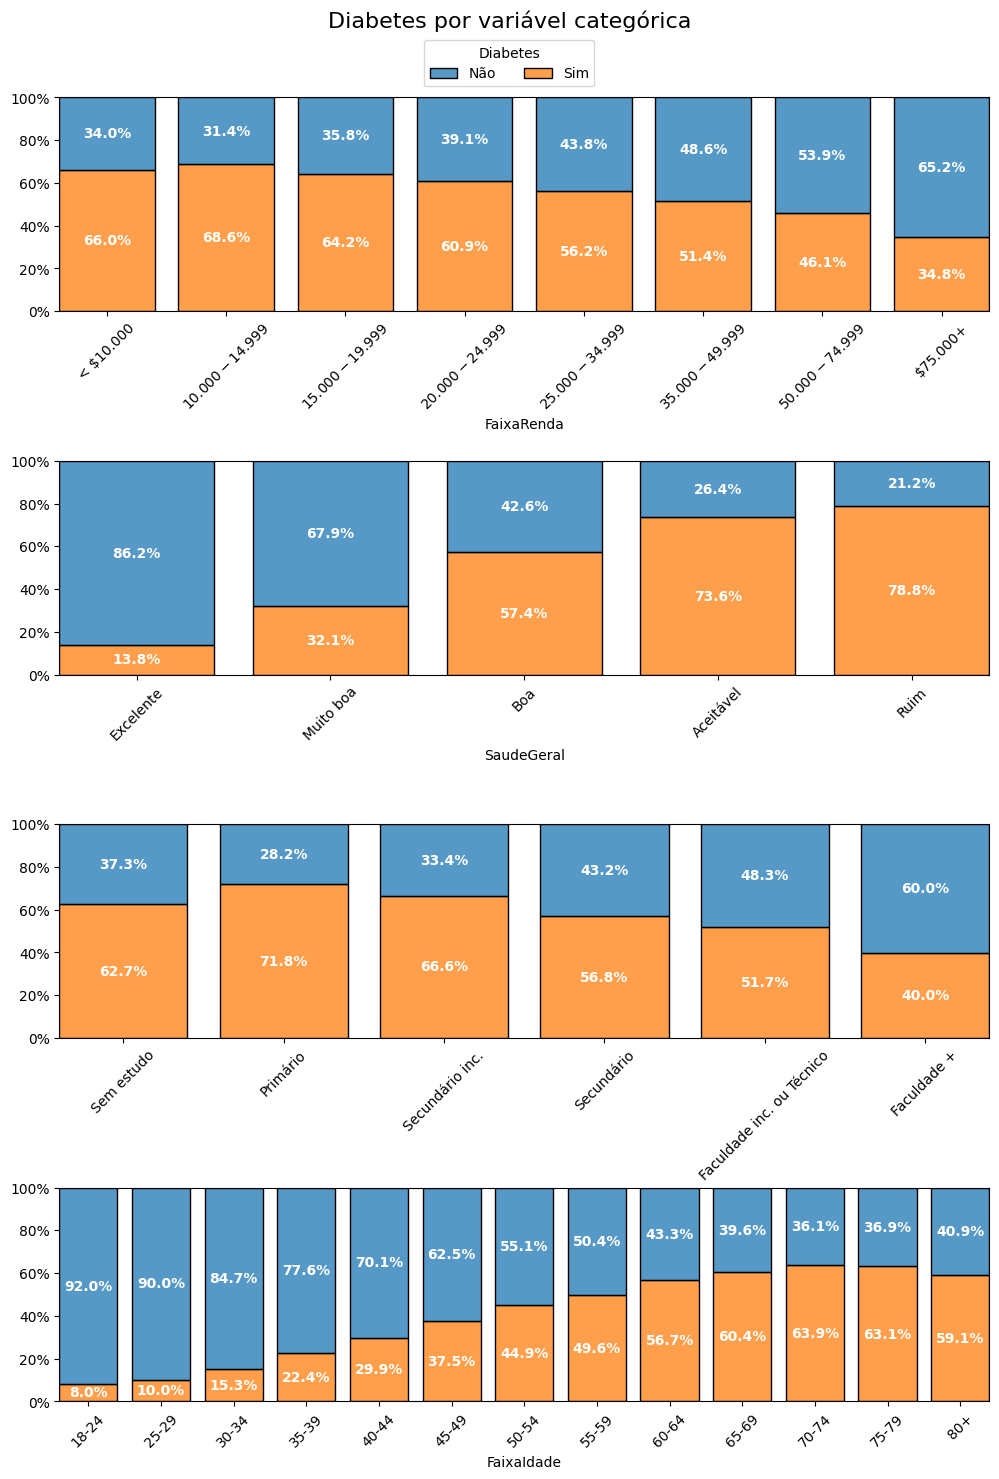

In [36]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12, 16))

for i, coluna in enumerate(colunas_nao_binarias):
    h = sns.histplot(x=coluna,
                     hue=coluna_alvo,
                     data=df_diabetes_tratado,
                     multiple='fill',
                     ax=axs.flat[i],
                     stat='percent',
                     shrink=0.8)
    h.tick_params(axis='x', labelrotation=45)

    h.yaxis.set_major_formatter(PercentFormatter(1))
    h.set_ylabel('')

    for bar in h.containers:
        h.bar_label(bar, label_type='center', labels=[f'{b.get_height():.1%}' for b in bar], color='white', weight='bold')

    legend = h.get_legend()
    legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Diabetes', bbox_to_anchor=(0.5, 0.965))
fig.suptitle('Diabetes por variável categórica', fontsize=16)

fig.align_labels()

plt.subplots_adjust(wspace=0.1, hspace=0.7, top=0.925)

plt.show()

### Verificando outras relações

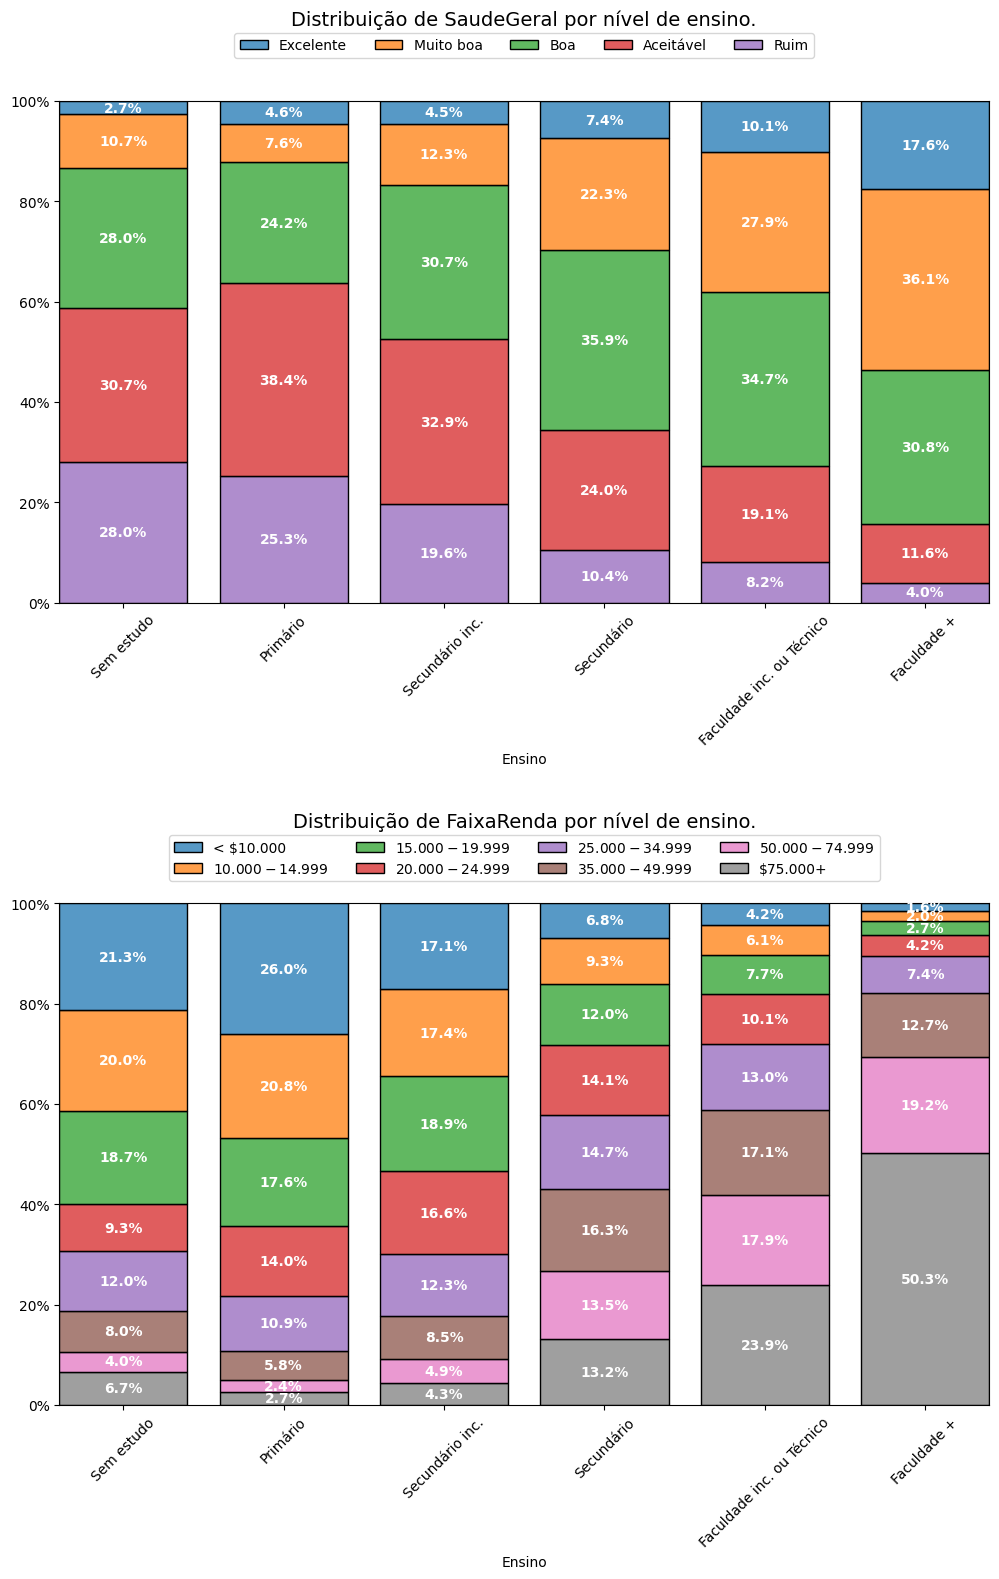

In [37]:
# Verificando outras relações além da coluna alvo

colunas_analise = ["SaudeGeral","FaixaRenda"]

from matplotlib.ticker import PercentFormatter

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

for ax, coluna in zip(axs.flatten(), colunas_analise):
    h = sns.histplot(x="Ensino",
                     hue=coluna,
                     data=df_diabetes_tratado,
                     multiple='fill',
                     ax=ax,
                     stat='percent',
                     shrink=0.8)
    h.tick_params(axis='x', labelrotation=45)

    h.yaxis.set_major_formatter(PercentFormatter(1))
    h.set_ylabel('')

    for bar in h.containers:
        h.bar_label(bar, label_type='center', labels=[f'{b.get_height():.1%}' for b in bar], color='white', weight='bold')

    legend = h.get_legend()

    labels = [text.get_text() for text in legend.get_texts()]

    numero_itens = len(df_diabetes_tratado[coluna].cat.categories)

    ax.legend(
        handles=legend.legend_handles,
        labels=labels,
        loc="upper center",
        ncols= numero_itens if numero_itens<= 6 else min(4,numero_itens),
        bbox_to_anchor=(0.5, 1.15)
    )

    ax.set_title(f"Distribuição de {coluna} por nível de ensino.", fontsize=14, pad=55)

plt.subplots_adjust(wspace=0.1, hspace=0.6, top=0.925)

plt.show()

### Cirando a tabela de contingência para verificar a correlação

In [38]:
tabelas_contingencia = {}

for coluna in df_diabetes_tratado.select_dtypes("category").columns:
    if coluna != coluna_alvo:
        tabelas_contingencia[coluna]= pd.crosstab(df_diabetes_tratado[coluna_alvo], df_diabetes_tratado[coluna])


In [39]:
tabelas_contingencia["PressaoAlta"]

PressaoAlta,Não,Sim
Diabetes,,
Não,22118,13228
Sim,8742,26604


### visualizando cada tabela

In [40]:
for coluna in df_diabetes_tratado.select_dtypes("category").columns:
    if coluna != coluna_alvo:
        display(
            pd.crosstab(
                df_diabetes_tratado[coluna_alvo], 
                df_diabetes_tratado[coluna], 
                margins=True, 
                normalize="index"
                ).style.format("{:.2%}"))

PressaoAlta,Não,Sim
Diabetes,,
Não,62.58%,37.42%
Sim,24.73%,75.27%
All,43.65%,56.35%


ColesterolAlto,Não,Sim
Diabetes,,
Não,61.87%,38.13%
Sim,32.99%,67.01%
All,47.43%,52.57%


ColesterolExame,Não,Sim
Diabetes,,
Não,4.27%,95.73%
Sim,0.68%,99.32%
All,2.47%,97.53%


Fumante,Não,Sim
Diabetes,,
Não,56.77%,43.23%
Sim,48.18%,51.82%
All,52.47%,47.53%


AVC,Não,Sim
Diabetes,,
Não,96.81%,3.19%
Sim,90.75%,9.25%
All,93.78%,6.22%


ProblemaCardiaco,Não,Sim
Diabetes,,
Não,92.73%,7.27%
Sim,77.71%,22.29%
All,85.22%,14.78%


AtividadeFisica,Não,Sim
Diabetes,,
Não,22.45%,77.55%
Sim,36.95%,63.05%
All,29.70%,70.30%


ComeFrutas,Não,Sim
Diabetes,,
Não,36.19%,63.81%
Sim,41.46%,58.54%
All,38.82%,61.18%


ComeLegumes,Não,Sim
Diabetes,,
Não,17.89%,82.11%
Sim,24.36%,75.64%
All,21.12%,78.88%


ConsumoBebidaAlcoolica,Não,Sim
Diabetes,,
Não,93.81%,6.19%
Sim,97.65%,2.35%
All,95.73%,4.27%


PlanoSaude,Não,Sim
Diabetes,,
Não,4.99%,95.01%
Sim,4.02%,95.98%
All,4.50%,95.50%


SemDinheiroConsultas,Não,Sim
Diabetes,,
Não,91.80%,8.20%
Sim,89.41%,10.59%
All,90.61%,9.39%


SaudeGeral,Excelente,Muito boa,Boa,Aceitável,Ruim
Diabetes,,,,,
Não,20.21%,38.17%,28.21%,9.94%,3.48%
Sim,3.23%,18.05%,38.07%,27.70%,12.95%
All,11.72%,28.11%,33.14%,18.82%,8.22%


DificuldadeAndar,Não,Sim
Diabetes,,
Não,86.58%,13.42%
Sim,62.88%,37.12%
All,74.73%,25.27%


Genero,Feminino,Masculino
Diabetes,,
Não,56.51%,43.49%
Sim,52.09%,47.91%
All,54.30%,45.70%


FaixaIdade,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+
Diabetes,,,,,,,,,,,,,
Não,2.55%,3.55%,4.91%,6.13%,6.99%,8.22%,10.71%,12.28%,12.39%,12.16%,8.21%,5.63%,6.27%
Sim,0.22%,0.40%,0.89%,1.77%,2.97%,4.93%,8.74%,12.06%,16.22%,18.55%,14.54%,9.63%,9.08%
All,1.38%,1.97%,2.90%,3.95%,4.98%,6.58%,9.72%,12.17%,14.30%,15.36%,11.38%,7.63%,7.68%


Ensino,Sem estudo,Primário,Secundário inc.,Secundário,Faculdade inc. ou Técnico,Faculdade +
Diabetes,,,,,,
Não,0.08%,1.31%,3.26%,23.78%,27.38%,44.19%
Sim,0.13%,3.35%,6.50%,31.31%,29.29%,29.42%
All,0.11%,2.33%,4.88%,27.55%,28.33%,36.81%


FaixaRenda,< $10.000,$10.000-$14.999,$15.000-$19.999,$20.000-$24.999,$25.000-$34.999,$35.000-$49.999,$50.000-$74.999,$75.000+
Diabetes,,,,,,,,
Não,3.47%,3.99%,5.63%,7.37%,9.92%,14.13%,17.43%,38.06%
Sim,6.74%,8.73%,10.09%,11.47%,12.74%,14.97%,14.90%,20.36%
All,5.11%,6.36%,7.86%,9.42%,11.33%,14.55%,16.16%,29.21%


Novamente observa-se que em todos os casos a hipótese nula de que não existe relação entre si, foi rejeitada. Porém deve-se levar em consideração a alta quantidade de dados que pode interferir no resultado.

In [41]:
for coluna, tabela in tabelas_contingencia.items():
    chi2, valor_p, _,_ = chi2_contingency(tabela)
    print(f"{coluna} - {chi2=} - {valor_p=}")


PressaoAlta - chi2=np.float64(10287.972984997781) - valor_p=np.float64(0.0)
ColesterolAlto - chi2=np.float64(5911.8066998822505) - valor_p=np.float64(0.0)
ColesterolExame - chi2=np.float64(939.6317718798653) - valor_p=np.float64(2.3798712773419562e-206)
Fumante - chi2=np.float64(522.4810772937883) - valor_p=np.float64(1.2211053080400827e-115)
AVC - chi2=np.float64(1111.0793074560897) - valor_p=np.float64(1.2908370989220163e-243)
ProblemaCardiaco - chi2=np.float64(3161.7202445322782) - valor_p=np.float64(0.0)
AtividadeFisica - chi2=np.float64(1778.9607035956992) - valor_p=np.float64(0.0)
ComeFrutas - chi2=np.float64(206.50090830615105) - valor_p=np.float64(7.967064756507964e-47)
ComeLegumes - chi2=np.float64(444.0806516898606) - valor_p=np.float64(1.4007103685991128e-98)
ConsumoBebidaAlcoolica - chi2=np.float64(635.0865339749427) - valor_p=np.float64(3.9133962745676324e-140)
PlanoSaude - chi2=np.float64(37.79561046998934) - valor_p=np.float64(7.855833890083924e-10)
SemDinheiroConsultas 

### Analisando as correlações

In [42]:
resultados_correlacao = df_diabetes_tratado.select_dtypes("category").apply(lambda coluna: coluna.cat.codes).corr(method="spearman", numeric_only=False)

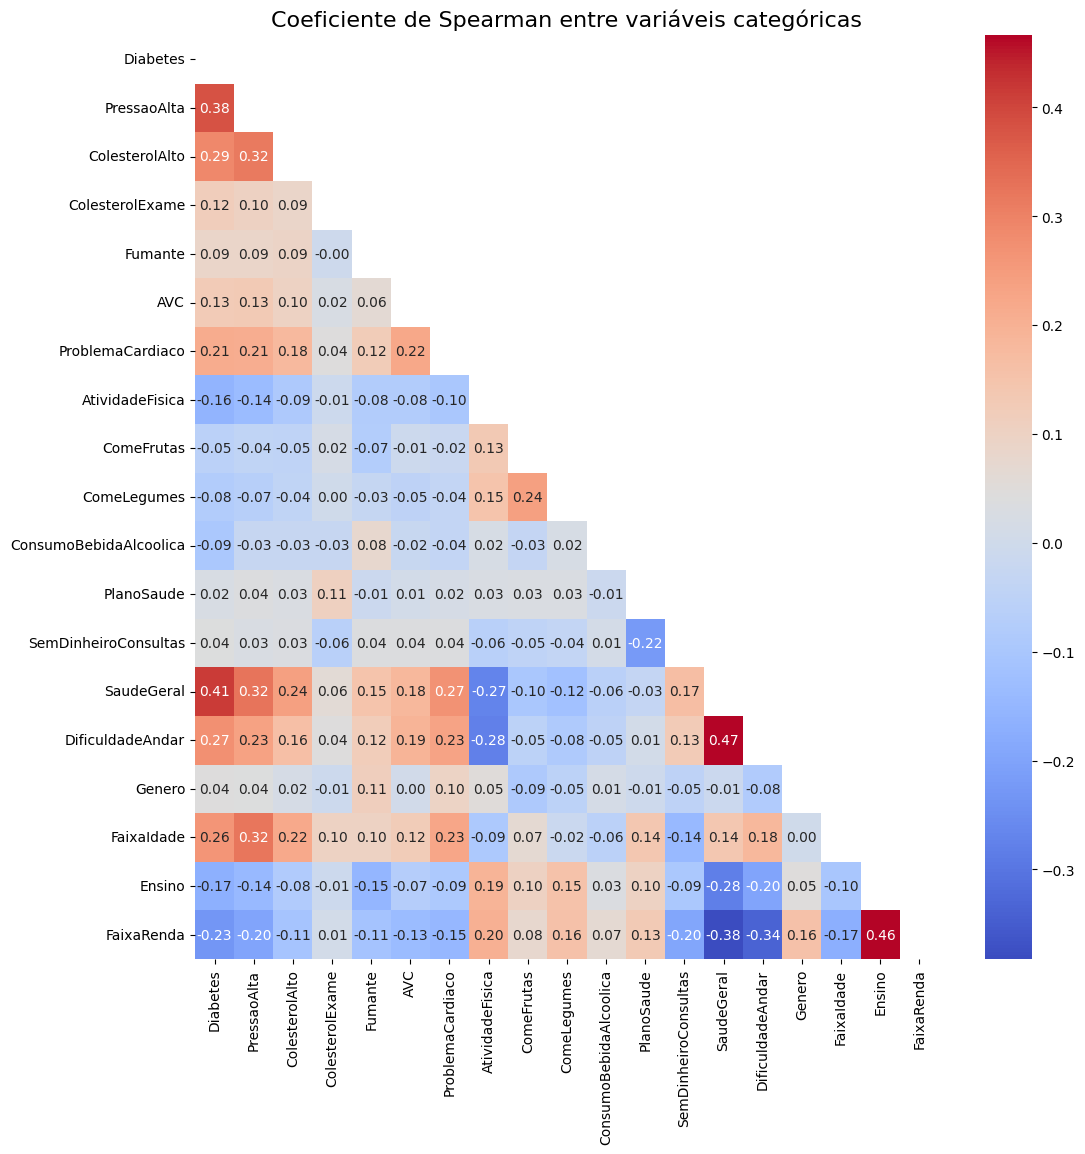

In [43]:
matriz = np.triu(resultados_correlacao)

fig, ax = plt.subplots(figsize= (12,12))

sns.heatmap(resultados_correlacao, mask=matriz, annot=True, fmt=".2f", ax=ax, cmap="coolwarm")
plt.title("Coeficiente de Spearman entre variáveis categóricas", fontsize=16)

plt.show()